#Week 8 - Naive Bayes Classification

Algoritma Naive Bayes memprediksi peluang di masa depan berdasarkan pengalaman di masa sebelumnya sehingga dikenal sebagai Teorema Bayes. Ciri utama dari Naive Bayes Classifier ini adalah asumsi yg sangat kuat (naïf) akan independensi dari masing-masing kondisi / kejadian.

Karena indpendensi tersebut, algoritma ini hanya membutuhkan jumlah data pelatihan (training data) yang kecil untuk menentukan estimasi parameter yang diperlukan dalam proses pengklasifikasian. Karena yang diasumsikan sebagai variabel independent, maka hanya varians dari suatu variabel dalam sebuah kelas yang dibutuhkan untuk menentukan klasifikasi, bukan keseluruhan dari matriks kovarians.

##Konsep Algoritma Naive Bayes

Sebagai contoh, terdapat suatu plot dimana orang-orang memilih untuk berkendara atau jalan kaki. 

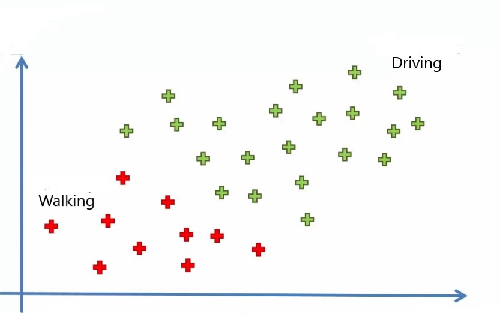

Dari 30 data di atas dapat dilihat bahwa ada dua kelompok data, dimana tanda merah menunjukkan orang tersebut berjalan kaki, sedangkan tanda hijau bermakna orang tersebut berkendara. Apabila kemudian bertambah satu buah data di antara kelompok data tersebut, maka tujuan naive bayes adalah menentukan kategori apa seharusnya data yang baru ditambahkan tersebut.

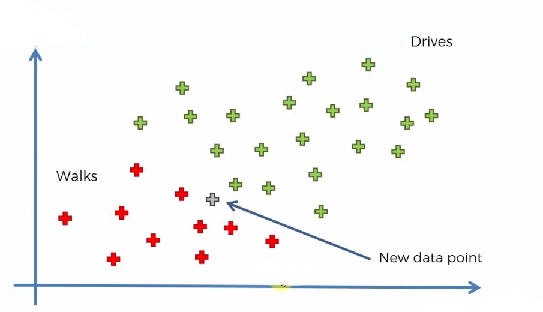

Karena ada dua kelompok/kategori data, maka hanya ada dua kemungkinan penerapan perhitungan naive bayes, yaitu berjalan kaki atau berkendara.

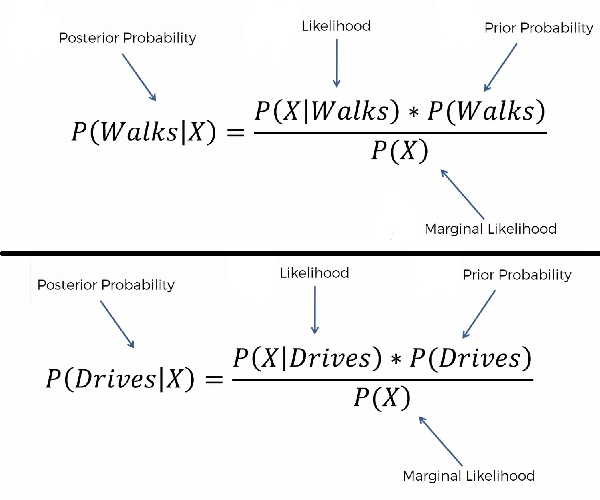

###Langkah Perhitungan


1. Lakukan perhitungan dari probabilitas yang ada, pada contoh ini akan menghitung probabilitas dari yang berjalan kaki.

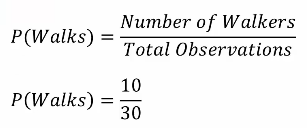



2. Asumsikan ada sebuah lingkaran di antara tanda baru tersebut dan hitung jumlah tanda lainnya yang ada pada lingkaran tersebut

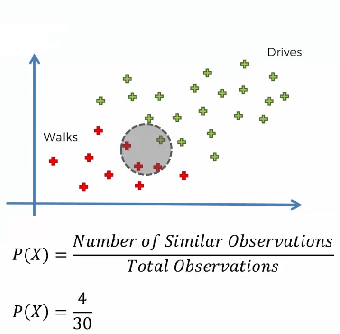



3. Hitung jumlah yang berjalan di antara lingkaran tersebut

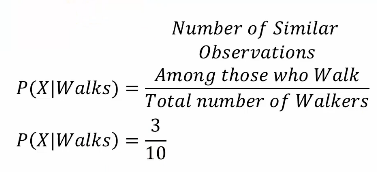



4. Terapkan teorema naive bayes

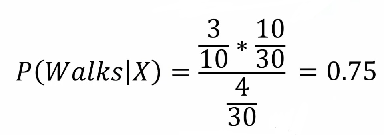

5. Dengan cara yang sama, apabila menghitung dengan menggunakan probabilitas berkendara hasilnya adalah 0.25

6. Perbandingan antara kedua hasil tersebut menunjukkan bahwa berjalan kaki memiliki hasil yang lebih besar (0.75) sehingga tanda baru tersebut adalah **berjalan kaki**

##Implementasi Algoritma Naive Bayes

Dataset untuk praktikum ini dapat diunduh pada link berikut :

https://ungu.in/bddm-week8-dataset

###Contoh 1 - Binary Classification

Klasfikasi jenis ini akan mengelompokkan data menjadi dua kelas. Pada contoh ini dataset yang digunakan adalah Social network ad dataset untuk menentukan apakah pengguna akan membeli suatu produk atau tidak, berdasarkan umur dan estimasi gajinya

Tahapan implementasi algoritma Naive Bayes adalah sebagai berikut :
1. Import Library
2. Load Dataset
3. Data Split
4. Create classifier model
5. Predict test data
6. Evaluate

####1. Import Library


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

####2. Load Dataset


In [ ]:
# Importing the dataset
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


####3. Data Split


In [ ]:
#X adalah variabel independen - berisi Age dan Estimated Salary 
X = df.iloc[:, [2, 3]].values

#y adalah variabel dependen - berisi fitur Purchased
y = df.iloc[:, -1].values

In [ ]:
#menampilkan nilai x dan y
print('X : \n',X[:5])
print('\ny : \n',y[:5])

X : 
 [[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]

y : 
 [0 0 0 0 0]


In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(320, 2)
(320,)
(80, 2)
(80,)


####4. Create classifier model

In [ ]:
# Training the Naive Bayes model on the Training set
classifier_model_binary = GaussianNB()
classifier_model_binary.fit(X_train, y_train)

GaussianNB()

####5. Predict test data


In [ ]:
# Predicting the Test set results
y_pred = classifier_model_binary.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
classifier_model_binary.predict_proba(X_test)

array([[0.89147043, 0.10852957],
       [0.84097849, 0.15902151],
       [0.85177346, 0.14822654],
       [0.91910807, 0.08089193],
       [0.89836193, 0.10163807],
       [0.95434022, 0.04565978],
       [0.90414431, 0.09585569],
       [0.03556946, 0.96443054],
       [0.98918806, 0.01081194],
       [0.50281633, 0.49718367],
       [0.95249262, 0.04750738],
       [0.96371556, 0.03628444],
       [0.85930139, 0.14069861],
       [0.7299999 , 0.2700001 ],
       [0.97431305, 0.02568695],
       [0.47994231, 0.52005769],
       [0.79297558, 0.20702442],
       [0.97847631, 0.02152369],
       [0.00422727, 0.99577273],
       [0.86019336, 0.13980664],
       [0.89871448, 0.10128552],
       [0.00500754, 0.99499246],
       [0.75594755, 0.24405245],
       [0.13376637, 0.86623363],
       [0.97909645, 0.02090355],
       [0.0047035 , 0.9952965 ],
       [0.9182418 , 0.0817582 ],
       [0.92764915, 0.07235085],
       [0.84823267, 0.15176733],
       [0.86172083, 0.13827917],
       [0.

In [ ]:
def predict_one(age, salary):
  print('Prediction : ',classifier_model_binary.predict([[age, salary]]))
  print('Probability : ',classifier_model_binary.predict_proba([[age, salary]]))

In [ ]:
predict_one(30,87000)

Prediction :  [0]
Probability :  [[0.89147043 0.10852957]]


####6. Evaluate

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[56,  2],
       [ 4, 18]])

In [ ]:
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.90      0.82      0.86        22

    accuracy                           0.93        80
   macro avg       0.92      0.89      0.90        80
weighted avg       0.92      0.93      0.92        80



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


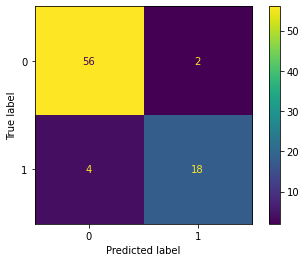

In [ ]:
import matplotlib.pyplot as plt
plot_confusion_matrix(classifier_model_binary, X_test, y_test)  
plt.show()

###Contoh 2 - Multiclass Classification
Multiclass classification akan mengelompokkan data menjadi beberapa kelas (>2). Dataset yang digunakan adalah data sample hasil survei SNMPTN UI 2017 oleh halo kampus yang sudah dilakukan cleaning data. Model klasifikasi akan menentukan jurusan berdasarkan fitur Matematika	Bahasa Inggris	Bahasa Indonesia	Prestasi Siswa	Prestasi Sekolah


Tahapan implementasi algoritma Naive Bayes adalah sebagai berikut :
1. Import Library
2. Load Dataset
3. Data Split
4. Create classifier model
5. Predict test data
6. Evaluate

####1. Import Library

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

####2. Load Dataset

In [ ]:
#memasukkan data
df_train = pd.read_excel("/content/data_train.xlsx")
df_test = pd.read_csv("/content/data_test.csv")

In [ ]:
df_train.head()

,Jurusan,Matematika,Bahasa Inggris,Bahasa Indonesia,Prestasi Siswa,Prestasi Sekolah
0,Matematika,92,86,88,1,1
1,Matematika,90,86,85,1,2
2,Sastra Inggris,82,87,92,2,1
3,Matematika,93,82,85,1,1
4,Sastra Inggris,86,85,88,1,1


####3. Data Split

In [ ]:
X_train = df_train.drop(["Jurusan"], axis=1).values
y_train = df_train['Jurusan'].values

X_test = df_test.drop(["Jurusan"], axis=1).values
y_test = df_test['Jurusan'].values

In [ ]:
X_train

array([[92, 86, 88,  1,  1],
       [90, 86, 85,  1,  2],
       [82, 87, 92,  2,  1],
       [93, 82, 85,  1,  1],
       [86, 85, 88,  1,  1],
       [91, 83, 84,  2,  2],
       [88, 80, 90,  2,  1],
       [84, 82, 88,  1,  1],
       [79, 89, 85,  1,  1],
       [83, 88, 81,  2,  2],
       [82, 85, 84,  2,  1]])

####4. Create Classifier Model

In [ ]:
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
classifier_model_multiclass = GaussianNB()

# Memasukkan data training pada fungsi klasifikasi naive bayes
classifier_model_multiclass.fit(X_train, y_train)

GaussianNB()

####5. Predict Test Data



In [ ]:
y_predict = classifier_model_multiclass.predict(X_test)
print("Prediksi Naive Bayes : ",y_predict)

Prediksi Naive Bayes :  ['Matematika' 'Matematika' 'Sastra Indonesia' 'Sastra Indonesia'
 'Sastra Inggris' 'Sastra Indonesia']


In [ ]:
#menentukan probabilitas hasil prediksi
classifier_model_multiclass.predict_proba(X_test)

array([[9.84514205e-01, 1.54850655e-02, 7.29022414e-07],
       [9.99987686e-01, 0.00000000e+00, 1.23143756e-05],
       [2.29659067e-20, 9.99999810e-01, 1.90218794e-07],
       [2.13516750e-09, 9.99999996e-01, 1.89843957e-09],
       [2.44441357e-13, 6.49045316e-06, 9.99993510e-01],
       [1.39716921e-06, 9.99998424e-01, 1.78428054e-07]])

In [ ]:
def predict_one(mat,ingg,indo,presis,presek):
  print('Predicted Jurusan : ',classifier_model_multiclass.predict([[mat,ingg,indo,presis,presek]]))
  print('Probability : ',classifier_model_multiclass.predict_proba([[mat,ingg,indo,presis,presek]]))

In [ ]:
predict_one(92,82,85,1,1)

Predicted Jurusan :  ['Matematika']
Probability :  [[9.84514205e-01 1.54850655e-02 7.29022414e-07]]


####6. Evaluate Model

In [ ]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[2, 0, 0],
       [0, 2, 0],
       [0, 1, 1]])

In [ ]:
print(classification_report(y_test,y_predict,zero_division=0))

                  precision    recall  f1-score   support

      Matematika       1.00      1.00      1.00         2
Sastra Indonesia       0.67      1.00      0.80         2
  Sastra Inggris       1.00      0.50      0.67         2

        accuracy                           0.83         6
       macro avg       0.89      0.83      0.82         6
    weighted avg       0.89      0.83      0.82         6



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


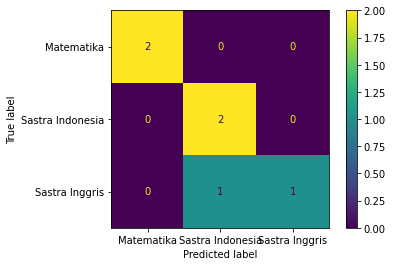

In [ ]:
import matplotlib.pyplot as plt
plot_confusion_matrix(classifier_model_multiclass, X_test, y_test)  
plt.show()

###Tugas

1. Menggunakan dataset StudentPerformance ( [StudentPerformance-encoded.csv](https://drive.google.com/file/d/1VM4DhdGyqXADYr9ZTExBnp7D4R1wmwCS/view?usp=share_link) ) 
2. Lakukan feature selection terhadap fitur "lulus_tepatwaktu" menggunakan metode : PEARSON CORRELATION
3. Pilih fitur yang memiliki korelasi >= 0.5
4. Gunakan nilai test data sebesar 0.3 dan randomstate = 21
5. Terapkan metode NAIVE BAYES untuk predict fitur "lulus_tepatwaktu"
6. Tampilkan hasil evaluasi model terhadap test data 

**Penamaan File : NIM_NaiveBayes.ipynb**

#**Referensi :**

https://medium.com/@16611055/analisis-menggunakan-naivebayes-dengan-python-pada-data-perawatan-kutil-dengan-cryotherapy-20ee5bc90561 

https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/

https://machinelearningmastery.com/naive-bayes-tutorial-for-machine-learning/